In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, 
                                  dropout=dropout)(x, x)

    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    # x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [3]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)


# 1D helix functions with 4 different parameters
x = r sin(t)

In [4]:
import pandas as pd
import random

# x = r sin(t)
# 1024 data points, 256 from each helix of a specific r
# each data point contains a x value and a class number idenfiying
#    the helix of a specific r
training_data = np.zeros((1024,2))
test_data = np.zeros((128,2))
training_labels = np.zeros(1024)
test_labels = np.zeros(128)
training_data.shape

(1024, 2)

In [5]:
# 4 random r values
rand_r = np.random.rand(4)
rand_r

array([0.90351714, 0.86970046, 0.77043063, 0.50185391])

In [6]:
class_id = 0
for r in rand_r:
    # generate training data
    t = np.random.rand(256)
    x = r * np.sin(t * np.pi)
    training_labels[class_id*256:(class_id+1)*256] = class_id
    training_data[class_id*256:(class_id+1)*256,0] = t
    training_data[class_id*256:(class_id+1)*256,1] = x

    # generate test data
    t = np.random.rand(32)
    x = r * np.sin(t * np.pi)
    test_labels[class_id*32:(class_id+1)*32] = class_id
    test_data[class_id*32:(class_id+1)*32,0] = t
    test_data[class_id*32:(class_id+1)*32,1] = x
    class_id += 1
training_data

array([[0.2239932 , 0.58461143],
       [0.87788813, 0.33817302],
       [0.08844505, 0.24783181],
       ...,
       [0.66240198, 0.43794103],
       [0.58218733, 0.48521815],
       [0.84039899, 0.24121853]])

In [7]:
test_data

array([[0.49166172, 0.90320716],
       [0.88595808, 0.3168252 ],
       [0.04473164, 0.12655249],
       [0.00345726, 0.00981318],
       [0.36024703, 0.81782505],
       [0.49555737, 0.90342914],
       [0.17741507, 0.47791774],
       [0.51700055, 0.9022288 ],
       [0.13779407, 0.37902411],
       [0.4846831 , 0.9024713 ],
       [0.67920434, 0.76407251],
       [0.25509882, 0.64903458],
       [0.2815665 , 0.69899776],
       [0.07723641, 0.21708924],
       [0.35708853, 0.81397389],
       [0.06280121, 0.17710592],
       [0.42768029, 0.88029776],
       [0.84822316, 0.4146756 ],
       [0.00811224, 0.02302396],
       [0.1675172 , 0.45384774],
       [0.25162223, 0.64213077],
       [0.84674036, 0.41841051],
       [0.89632086, 0.28911533],
       [0.21744795, 0.57032349],
       [0.38740339, 0.84757699],
       [0.49777779, 0.90349512],
       [0.05423953, 0.153214  ],
       [0.8840148 , 0.32198498],
       [0.54690865, 0.89372391],
       [0.77851426, 0.57916666],
       [0.

In [8]:
training_data = training_data.reshape((training_data.shape[0], training_data.shape[1], 1))
training_data

array([[[0.2239932 ],
        [0.58461143]],

       [[0.87788813],
        [0.33817302]],

       [[0.08844505],
        [0.24783181]],

       ...,

       [[0.66240198],
        [0.43794103]],

       [[0.58218733],
        [0.48521815]],

       [[0.84039899],
        [0.24121853]]])

In [9]:
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
test_data

array([[[0.49166172],
        [0.90320716]],

       [[0.88595808],
        [0.3168252 ]],

       [[0.04473164],
        [0.12655249]],

       [[0.00345726],
        [0.00981318]],

       [[0.36024703],
        [0.81782505]],

       [[0.49555737],
        [0.90342914]],

       [[0.17741507],
        [0.47791774]],

       [[0.51700055],
        [0.9022288 ]],

       [[0.13779407],
        [0.37902411]],

       [[0.4846831 ],
        [0.9024713 ]],

       [[0.67920434],
        [0.76407251]],

       [[0.25509882],
        [0.64903458]],

       [[0.2815665 ],
        [0.69899776]],

       [[0.07723641],
        [0.21708924]],

       [[0.35708853],
        [0.81397389]],

       [[0.06280121],
        [0.17710592]],

       [[0.42768029],
        [0.88029776]],

       [[0.84822316],
        [0.4146756 ]],

       [[0.00811224],
        [0.02302396]],

       [[0.1675172 ],
        [0.45384774]],

       [[0.25162223],
        [0.64213077]],

       [[0.84674036],
        [0.4

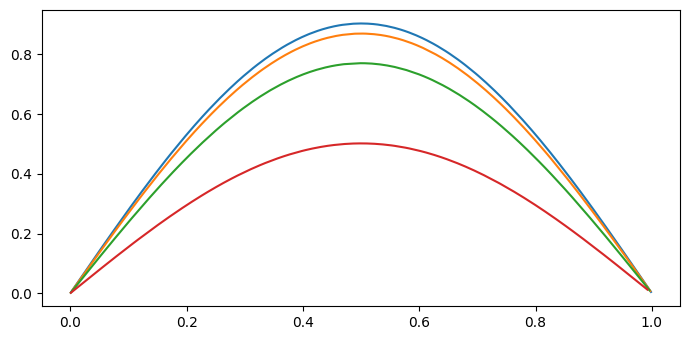

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

class1 = (training_data[training_labels == 0, :][:,:,0])
class2 = (training_data[training_labels == 1, :][:,:,0])
class3 = (training_data[training_labels == 2, :][:,:,0])
class4 = (training_data[training_labels == 3, :][:,:,0])

# order x and y values so the series can be plotted
class1 = class1[class1[:,0].argsort()]
class2 = class2[class2[:,0].argsort()]
class3 = class3[class3[:,0].argsort()]
class4 = class4[class4[:,0].argsort()]

x1, y1 = class1.T
x2, y2 = class2.T
x3, y3 = class3.T
x4, y4 = class4.T

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.show()

In [11]:
# shuffle rows in training data and training labels
idx = np.random.permutation(len(training_data))
training_data = training_data[idx]
training_labels = training_labels[idx].astype(int)

In [12]:
# shuffle rows in test data and test labels
idx = np.random.permutation(len(test_data))
test_data = test_data[idx]
test_labels = test_labels[idx].astype(int)

In [13]:
class NBatchProgBarLogger(keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def __init__(self, display):
        self.counter = 0
        self.display = display
        self.epoch = 0
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch

    def on_epoch_end(self, batch, logs=None):
        if self.counter == self.display or self.epoch == 1:
            print('Epoch: ' + str(self.epoch) + ', training loss: ' + str(logs['loss'])
             + ', training accr: ' + str(logs['sparse_categorical_accuracy'])
             + ', val loss: ' + str(logs['val_loss'])
             + ', val accr: ' + str(logs['val_sparse_categorical_accuracy']))
            if self.epoch > 1:
                self.counter = 0
        self.counter += 1

In [14]:
input_shape = training_data.shape[1:]
n_classes = len(np.unique(training_labels))
display_interval = 50

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.2,
    dropout=0.1,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"],
)

model.summary()

# callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), NBatchProgBarLogger(display_interval)]


history = model.fit(
    training_data,
    training_labels,
    validation_split=0.25,
    epochs=500,
    batch_size=64,
    callbacks=callbacks,
    # verbose=1 if epoch%display_interval==0 else 0
    # set verbose = 1 to see a progress bar for every epoch
    verbose = 0
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 2, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 2, 1)        7169        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

 mbda)                                                            'tf.__operators__.add_5[0][0]'] 
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 2, 1)        2           ['tf.__operators__.add_6[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv1d_6 (Conv1D)              (None, 2, 4)         8           ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_7 (Dropout)            (None, 2, 4)         0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 2, 1)         5           ['dropout_7[0][0]']              
          

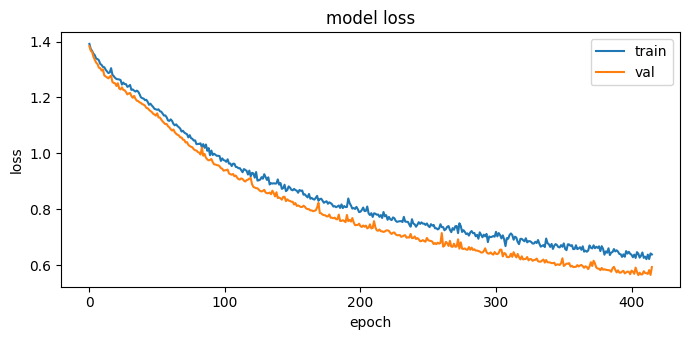

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

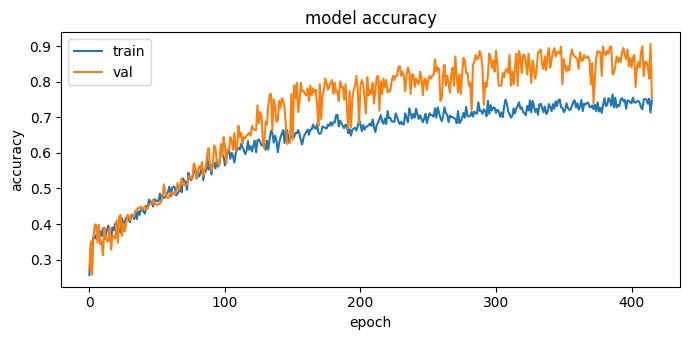

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [17]:
# Evaluate the model on the test set
results = model.evaluate(test_data, test_labels, verbose=0)
print("Test loss, test acc:", results)

Test loss, test acc: [0.6028994917869568, 0.7890625]
